<a href="https://colab.research.google.com/github/gunisha30/codes/blob/master/Copy_of_audio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install praat-parselmouth

In [1]:
pip install pitch

pitch = 135.59322033898306


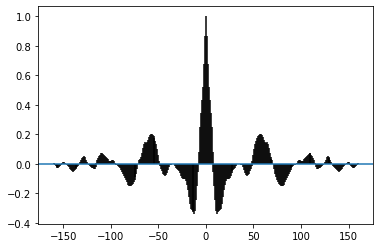

In [4]:
import pitch

p = pitch.find_pitch('/content/drive/My Drive/awarathon/audio2.wav')

print('pitch =', p)

In [0]:
!sudo apt-get install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0
!sudo apt-get install ffmpeg libav-tools
!sudo pip install pyaudio

In [0]:
import librosa as l
import os
import numpy as np
os.chdir('/content/drive/My Drive/awarathon')
arr,sr=l.load('George.wav')
arr.size#/sr #length
#print(sr)
2871072/22050
u=22049*5
l=u-22049
arrnew=arr[l:u+1]
np.sum(arrnew)/22050

In [0]:
#convert mp4 to wav 
import sys
import os
from moviepy.editor import *

# name is the path, if its in the root directory then its just the video name
def convert_to_audio(name):
  video = VideoFileClip(name)
  audio = video.audio
  audio.write_audiofile('snigdhaq3.wav')

#folder renaming: first-Nishkarsh second-Yash third-Vishesh

#os.chdir('/content/drive/My Drive/awarathon/videos')
name="snigdhaq3.mp4"
convert_to_audio(name)

In [0]:
import parselmouth
from parselmouth.praat import call, run_file
import inspect as i
import sys
import scipy.io.wavfile
import math
import moviepy.editor as mp

#os.chdir('/content')
def mysppaus(m,p,l):              #pause rate and articulation rate
    sound=p+"/"+m+".wav"          #entire path till audio file
    sourcerun="/content/drive/My Drive/awarathon/myspsolution.praat"                  #path till mysolution.praat
    path=p                        #path till the folder which has audio file
    try:
        objects= run_file(sourcerun, -20, 2, 1, "yes",sound,path, 80, 400, 0.01, capture_output=True) 
        z1=str(objects[1])
        z2=z1.strip().split()
        print(z2)
        print ("articulation rate=",z2[3])
        p=int(z2[1])                          #pause length in secs
        #p=p/60                                #pause length in mins
        a=p/l                                 #ratio of pause length and total length
        print("rate of pause=",a)
        print ("pause percentage=",a*100)
        #print(p)
    except:
        print ("Try again the sound of the audio was not clear")
    return;


audioname="anjaliq6"
path1="/content/drive/My Drive/awarathon/videos"
#path1='/content'
#length of video files 

clip = mp.VideoFileClip('/content/drive/My Drive/awarathon/videos/anjaliq6.mp4')
duration = math.floor(clip.duration)
image_time_interval = 2
#duration=duration/60
print("length=",duration/60)

mysppaus(audioname,path1,duration)

In [0]:
pip install aubio

In [0]:
import scipy.io.wavfile
import os
os.chdir('/content/drive/My Drive/awarathon')
rate, arr = scipy.io.wavfile.read("George.wav")
print(arr.shape[0])
print(arr.size)
length=arr.shape[0]/rate
print(length/60)
  


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
pip install demo_waveform_plot

ERROR: Could not find a version that satisfies the requirement demo_waveform_plot (from versions: none)
ERROR: No matching distribution found for demo_waveform_plot


In [0]:
import youtube_dl

def download_from_vimeo(vid_link):
    ydl = youtube_dl.YoutubeDL({'outtmpl':'vid.mp4'})

    with ydl:
        result = ydl.extract_info(
            vid_link,
            download=True # We just want to extract the info
        )

    if 'entries' in result:
        # Can be a playlist or a list of videos
        video = result['entries'][0]
    else:
        # Just a video
        video = result

    print(video)

download_from_vimeo('https://player.vimeo.com/video/348632880')

In [0]:
import sys
from aubio import source, pitch

# if len(sys.argv) < 2:
#     print("Usage: %s <filename> [samplerate]" % sys.argv[0])
#     sys.exit(1)
# filename = sys.argv[1]
filename="/content/drive/My Drive/awarathon/audio1.wav"
downsample = 1
samplerate = 44100 // downsample
# if len( sys.argv ) > 2: samplerate = int(sys.argv[2])


win_s = 4096 // downsample # fft size
hop_s = 512  // downsample # hop size

s = source(filename, samplerate, hop_s)
samplerate = s.samplerate

tolerance = 0.8

pitch_o = pitch("yin", win_s, hop_s, samplerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    #pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    #if confidence < 0.8: pitch = 0.
    print("%f %f %f" % (total_frames / float(samplerate), pitch, confidence))
    pitches += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s: break

if 0: sys.exit(0)

#print pitches
import os.path
from numpy import array, ma
import matplotlib.pyplot as plt
from demo_waveform_plot import get_waveform_plot, set_xlabels_sample2time

skip = 1

pitches = array(pitches[skip:])
confidences = array(confidences[skip:])
times = [t * hop_s for t in range(len(pitches))]

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1 = get_waveform_plot(filename, samplerate = samplerate, block_size = hop_s, ax = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_xlabel('')

def array_from_text_file(filename, dtype = 'float'):
    filename = os.path.join(os.path.dirname(__file__), filename)
    return array([line.split() for line in open(filename).readlines()],
        dtype = dtype)

ax2 = fig.add_subplot(312, sharex = ax1)
ground_truth = os.path.splitext(filename)[0] + '.f0.Corrected'
if os.path.isfile(ground_truth):
    ground_truth = array_from_text_file(ground_truth)
    true_freqs = ground_truth[:,2]
    true_freqs = ma.masked_where(true_freqs < 2, true_freqs)
    true_times = float(samplerate) * ground_truth[:,0]
    ax2.plot(true_times, true_freqs, 'r')
    ax2.axis( ymin = 0.9 * true_freqs.min(), ymax = 1.1 * true_freqs.max() )
# plot raw pitches
ax2.plot(times, pitches, '.g')
# plot cleaned up pitches
cleaned_pitches = pitches
#cleaned_pitches = ma.masked_where(cleaned_pitches < 0, cleaned_pitches)
#cleaned_pitches = ma.masked_where(cleaned_pitches > 120, cleaned_pitches)
cleaned_pitches = ma.masked_where(confidences < tolerance, cleaned_pitches)
ax2.plot(times, cleaned_pitches, '.-')
#ax2.axis( ymin = 0.9 * cleaned_pitches.min(), ymax = 1.1 * cleaned_pitches.max() )
#ax2.axis( ymin = 55, ymax = 70 )
plt.setp(ax2.get_xticklabels(), visible = False)
ax2.set_ylabel('f0 (midi)')

# plot confidence
ax3 = fig.add_subplot(313, sharex = ax1)
# plot the confidence
ax3.plot(times, confidences)
# draw a line at tolerance
ax3.plot(times, [tolerance]*len(confidences))
ax3.axis( xmin = times[0], xmax = times[-1])
ax3.set_ylabel('condidence')
set_xlabels_sample2time(ax3, times[-1], samplerate)
plt.show()
#plt.savefig(os.path.basename(filename) + '.svg')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: AUBIO WARNING: source_avcodec: upsampling /content/drive/My Drive/awarathon/audio1.wav from 8000 to 44100


0.000000 21.751665 0.000000
0.011610 28.774033 0.000000
0.023220 40.782494 0.000000
0.034830 160.765579 0.000000
0.046440 33.904308 0.285644
0.058050 33.868134 0.458316
0.069660 34.160461 0.531529
0.081270 22.299629 0.586404
0.092880 22.214401 0.764723
0.104490 21.766834 0.762437
0.116100 21.809481 0.393971
0.127710 21.802422 0.491681
0.139320 22.136429 0.396072
0.150930 22.839952 0.396996
0.162540 22.746559 0.693481
0.174150 22.949070 0.673730
0.185760 33.994118 0.226186
0.197370 22.157967 0.848097
0.208980 22.596788 0.816634
0.220590 22.257504 0.798631
0.232200 22.704777 0.806228
0.243810 22.236240 0.484514
0.255420 22.030811 0.462647
0.267029 22.363689 0.295506
0.278639 22.069626 0.255751
0.290249 22.544895 0.481726
0.301859 22.103664 0.363394
0.313469 34.552963 0.174348
0.325079 35.772488 0.181703
0.336689 23.112263 0.324121
0.348299 35.391911 0.304029
0.359909 22.641045 0.341496
0.371519 23.079834 0.252718
0.383129 35.837948 0.153199
0.394739 35.840370 0.068823
0.406349 34.473946 

ModuleNotFoundError: ignored